In [1]:
#import pandas, numpy, matplotlib, datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
#read csv file
drug = pd.read_csv('./drug_death/VSRR_Provisional_Drug_Overdose_Death_Counts.csv', sep=',')

In [3]:
#drug dataframe
drug

,State,State Name,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,Footnote
0,AK,Alaska,2015,January,12 month-ending,Number of Deaths,"4,034",100.0,0.000000,NaN
1,AK,Alaska,2015,February,12 month-ending,Number of Deaths,"4,084",100.0,0.000000,NaN
2,AK,Alaska,2015,March,12 month-ending,Number of Deaths,"4,101",100.0,0.000000,NaN
3,AK,Alaska,2015,April,12 month-ending,Number of Deaths,"4,133",100.0,0.000000,NaN
4,AK,Alaska,2015,May,12 month-ending,Number of Deaths,"4,196",100.0,0.000000,NaN
5,AK,Alaska,2015,June,12 month-ending,Number of Deaths,"4,201",100.0,0.000000,NaN
6,AK,Alaska,2015,July,12 month-ending,Number of Deaths,"4,220",100.0,0.000000,NaN
7,AK,Alaska,2015,August,12 month-ending,Number of Deaths,"4,222",100.0,0.000000,NaN
8,AK,Alaska,2015,September,12 month-ending,Number of Deaths,"4,242",100.0,0.000000,NaN
9,AK,Alaska,2015,October,12 month-ending,Number of Deaths,"4,241",100.0,0.000000,NaN


In [3]:
#convert Month column into an integer so it can be put in a Year/Month format
def convert_month(mon):
    month_dictionary = {'January' : 1, 
                       'February' : 2,
                       'March' : 3,
                       'April' : 4,
                       'May' : 5,
                       'June' : 6,
                       'July' : 7,
                       'August' : 8,
                       'September' : 9,
                       'October' : 10,
                       'November' : 11,
                       'December' : 12}
    try:
        return month_dictionary[mon]
    except:
        return 'N'

In [5]:
#test if convert_month works
convert_month('February')

2

In [4]:
#apply convert_month to 'Month' column
drug['Month'] = drug['Month'].apply(convert_month)

In [7]:
#check if convert_month has been applied to 'Month' column
drug.head(5)

,State,State Name,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,Footnote
0,AK,Alaska,2015,1,12 month-ending,Number of Deaths,"4,034",100.0,0.0,NaN
1,AK,Alaska,2015,2,12 month-ending,Number of Deaths,"4,084",100.0,0.0,NaN
2,AK,Alaska,2015,3,12 month-ending,Number of Deaths,"4,101",100.0,0.0,NaN
3,AK,Alaska,2015,4,12 month-ending,Number of Deaths,"4,133",100.0,0.0,NaN
4,AK,Alaska,2015,5,12 month-ending,Number of Deaths,"4,196",100.0,0.0,NaN


In [8]:
#checking data types for each column
drug.dtypes

State                             object
State Name                        object
Year                               int64
Month                              int64
Period                            object
Indicator                         object
Data Value                        object
Percent Complete                 float64
Percent Pending Investigation    float64
Footnote                          object
dtype: object

In [9]:
#verifying no Nulls in 'Month'
drug['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [5]:
#creating column 'Year/Month' that combines 'Year' and 'Month' columns to a datetime format
drug['Year/Month'] = pd.to_datetime(drug['Year'].astype(str) + "/" + drug['Month'].astype(str), format='%Y/%m', errors='ignore')
drug.head(5)

,State,State Name,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,Footnote,Year/Month
0,AK,Alaska,2015,1,12 month-ending,Number of Deaths,"4,034",100.0,0.0,NaN,2015-01-01
1,AK,Alaska,2015,2,12 month-ending,Number of Deaths,"4,084",100.0,0.0,NaN,2015-02-01
2,AK,Alaska,2015,3,12 month-ending,Number of Deaths,"4,101",100.0,0.0,NaN,2015-03-01
3,AK,Alaska,2015,4,12 month-ending,Number of Deaths,"4,133",100.0,0.0,NaN,2015-04-01
4,AK,Alaska,2015,5,12 month-ending,Number of Deaths,"4,196",100.0,0.0,NaN,2015-05-01


In [6]:
#removing ',' from 'Data Value' and converting into integer
drug['Data Value'] = drug['Data Value'].str.replace(',','')
drug['Data Value'] = pd.to_numeric(drug['Data Value'])

In [12]:
#viewing unique listings of indicators of death
drug['Indicator'].unique()

array(['Number of Deaths', 'Number of Drug Overdose Deaths',
       'Cocaine (T40.5)', 'Heroin (T40.1)', 'Methadone (T40.3)',
       'Natural & semi-synthetic opioids (T40.2)',
       'Opioids (T40.0-T40.4,T40.6)', 'Percent with drugs specified',
       'Psychostimulants with abuse potential (T43.6)',
       'Synthetic opioids, excl. methadone (T40.4)'], dtype=object)

In [13]:
#viewing unique listings of states
drug['State Name'].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland',
       'Massachusetts', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Montana', 'Mississippi', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Virginia', 'Vermont',
       'Washington', 'Wisconsin', 'West Virginia', 'Wyoming',
       'New York City'], dtype=object)

In [14]:
#dataframe filtered by state name
drug[drug['State Name'] == 'United States'].head(5)

,State,State Name,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,Footnote,Year/Month
6336,US,United States,2015,1,12 month-ending,Cocaine (T40.5),5496.0,100.0,0.143178,NaN,2015-01-01
6337,US,United States,2015,2,12 month-ending,Cocaine (T40.5),5592.0,100.0,0.146003,NaN,2015-02-01
6338,US,United States,2015,3,12 month-ending,Cocaine (T40.5),5729.0,100.0,0.145001,NaN,2015-03-01
6339,US,United States,2015,4,12 month-ending,Cocaine (T40.5),5908.0,100.0,0.146454,NaN,2015-04-01
6340,US,United States,2015,5,12 month-ending,Cocaine (T40.5),5987.0,100.0,0.146197,NaN,2015-05-01


In [7]:
#filtering 'Indicator' to accept specific values
drug = drug.loc[lambda x: (
        x["Indicator"].isin([
            'Number of Drug Overdose Deaths',
       'Cocaine (T40.5)', 'Heroin (T40.1)', 'Methadone (T40.3)',
       'Natural & semi-synthetic opioids (T40.2)',
       'Opioids (T40.0-T40.4,T40.6)',
       'Psychostimulants with abuse potential (T43.6)',
       'Synthetic opioids, excl. methadone (T40.4)'
        ]))]


In [9]:
#mean, min, max of overdose death by indicator type
drug[drug['State Name'] == 'United States'].groupby(by=['Indicator'])['Data Value'].agg(['mean', 'min', 'max']).sort_values(by = 'max', ascending = False)

,mean,min,max
Indicator,,,
Number of Drug Overdose Deaths,57596.181818,47523.0,67944.0
"Opioids (T40.0-T40.4,T40.6)",37290.393939,28986.0,45657.0
"Synthetic opioids, excl. methadone (T40.4)",14431.757576,5766.0,26127.0
Heroin (T40.1),13871.424242,10788.0,15850.0
Natural & semi-synthetic opioids (T40.2),13491.454545,12237.0,14806.0
Cocaine (T40.5),8624.303030,5496.0,12995.0
Psychostimulants with abuse potential (T43.6),6639.939394,4402.0,9450.0
Methadone (T40.3),3322.454545,3092.0,3421.0


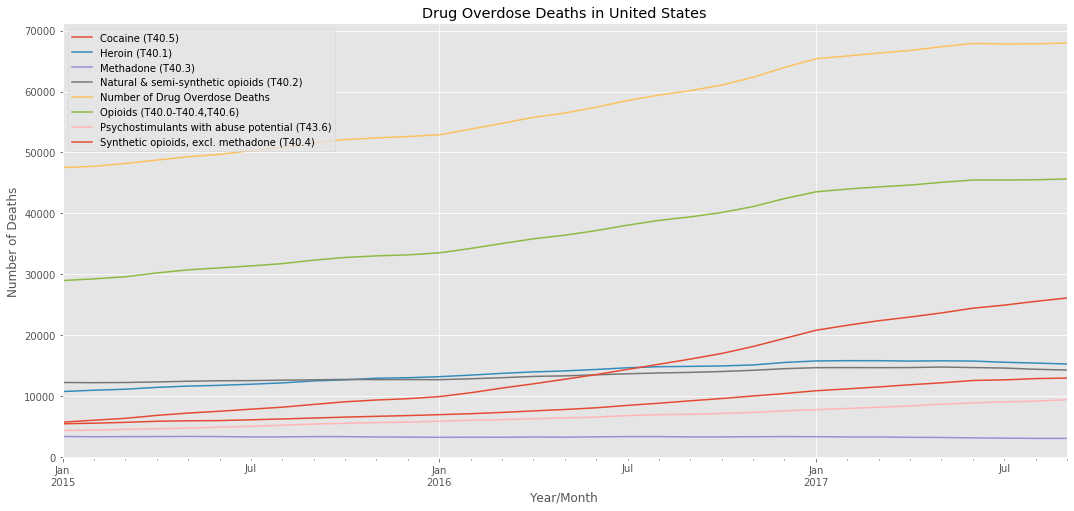

In [17]:
#plotting drug overdose death for all indicator types in United States
fig, ax = plt.subplots()
drug[drug['State Name'] == 'United States'].groupby(by = ['Indicator']).plot(kind='line', x='Year/Month', y='Data Value', 
figsize=(18,8), legend = True, ax = ax) 
ax.legend(["Cocaine (T40.5)", "Heroin (T40.1)", "Methadone (T40.3)", 
"Natural & semi-synthetic opioids (T40.2)", "Number of Drug Overdose Deaths", "Opioids (T40.0-T40.4,T40.6)", 
"Psychostimulants with abuse potential (T43.6)", "Synthetic opioids, excl. methadone (T40.4)"])
plt.ylabel('Number of Deaths')
plt.xlabel('Year/Month')
plt.title('Drug Overdose Deaths in United States');

In [11]:
#creating new data frame that only looks at States and removes United States as a whole
drug2 = drug.loc[lambda x: (
        x["State Name"].isin([
            'Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Indiana',
       'Illinois', 'Kansas', 'Kentucky', 'Maryland', 'Louisiana',
       'Massachusetts', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Vermont',
       'Washington', 'Wisconsin', 'West Virginia', 'Wyoming',
       'New York City'
        ]))]

In [19]:
#verifying that 'US' is no longer in drug2 dataframe
drug2['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IN', 'IL', 'KS', 'KY', 'MD', 'LA', 'MA', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'YC'], dtype=object)

In [44]:
#state number of drug overdose deaths mean, min, max
drug2[drug2['Indicator'] == 'Number of Drug Overdose Deaths'].groupby(by=['State'])['Data Value'].agg(['mean', 'min', 'max']).sort_values(by = 'max', ascending = False)

,mean,min,max
State,,,
FL,4067.969697,2755.0,5670.0
PA,3926.424242,2788.0,5605.0
OH,3865.090909,2828.0,5288.0
CA,4718.393939,4603.0,4844.0
TX,2691.787879,2517.0,2875.0
IL,2127.212121,1652.0,2646.0
NJ,1712.272727,1210.0,2542.0
NY,1989.151515,1510.0,2357.0
MI,2015.606061,1796.0,2342.0


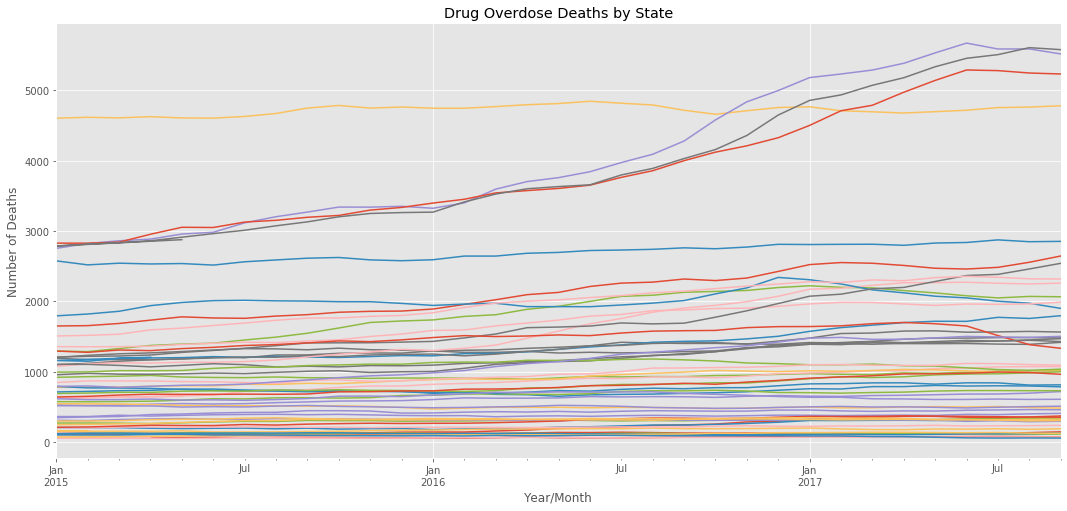

In [12]:
#plotting number of drug overdose deaths by state
fig, ax = plt.subplots()
drug2[drug2['Indicator'] == 'Number of Drug Overdose Deaths'].groupby(by = ['State']).plot(kind='line', x='Year/Month', y='Data Value', 
figsize=(18,8), legend = False, ax = ax)
plt.ylabel('Number of Deaths')
plt.xlabel('Year/Month')
plt.title('Drug Overdose Deaths by State');

In [43]:
#state cocaine overdose deaths mean, min, max
drug2[drug2['Indicator'] == 'Cocaine (T40.5)'].groupby(by=['State'])['Data Value'].agg(['mean', 'min', 'max']).sort_values(by = 'max', ascending = False)

,mean,min,max
State,,,
YC,391.545455,221.0,613.0
NY,435.121212,277.0,611.0
NC,397.727273,220.0,576.0
MD,235.121212,109.0,458.0
VA,209.606061,125.0,314.0
CT,197.090909,118.0,292.0
SC,130.727273,93.0,217.0
WV,119.818182,60.0,196.0
DC,71.303030,29.0,133.0


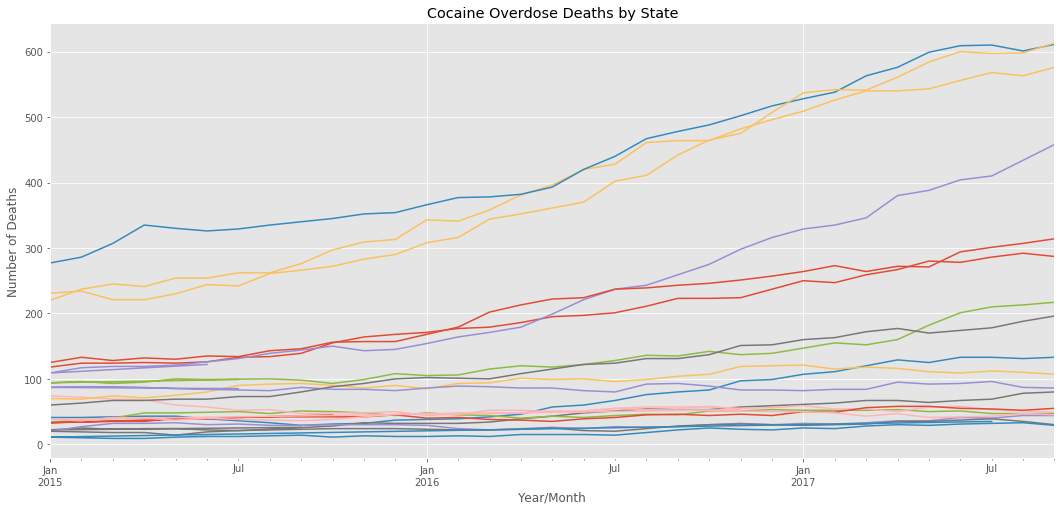

In [21]:
#plotting cocaine overdose deaths by state
fig, ax = plt.subplots()
drug2[drug2['Indicator'] == 'Cocaine (T40.5)'].groupby(by = ['State']).plot(kind='line', x='Year/Month', y='Data Value', 
figsize=(18,8), legend = False, ax = ax) 
plt.ylabel('Number of Deaths')
plt.xlabel('Year/Month')
plt.title('Cocaine Overdose Deaths by State');

In [42]:
#state heroin overdose deaths mean, min, max
drug2[drug2['Indicator'] == 'Heroin (T40.1)'].groupby(by=['State'])['Data Value'].agg(['mean', 'min', 'max']).sort_values(by = 'max', ascending = False)

,mean,min,max
State,,,
NY,697.363636,544.0,773.0
MD,501.454545,327.0,692.0
YC,469.030303,292.0,629.0
NC,431.303030,270.0,558.0
VA,381.333333,246.0,532.0
CT,409.878788,294.0,475.0
WA,303.363636,284.0,335.0
WV,218.969697,177.0,257.0
DC,107.333333,48.0,176.0


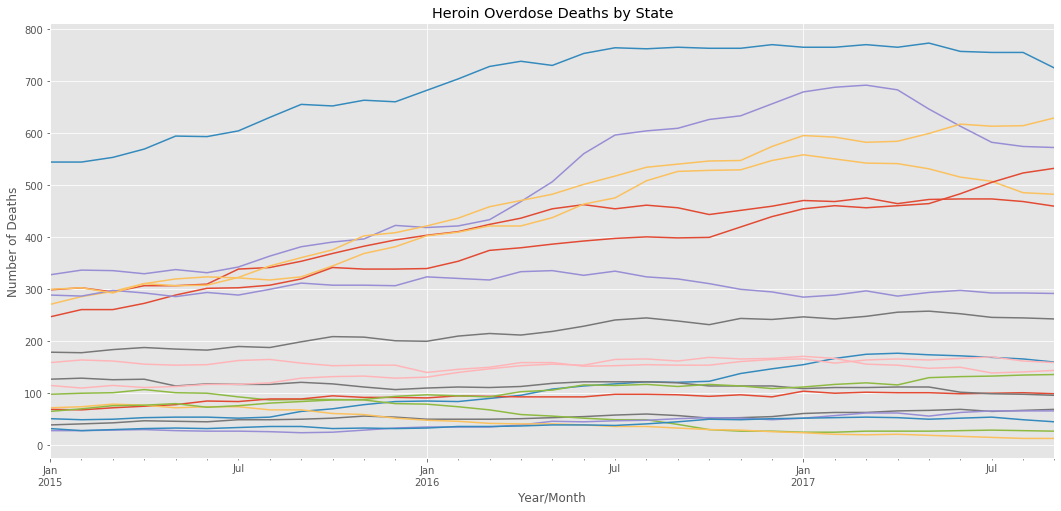

In [22]:
#plotting heroin overdose deaths by state
fig, ax = plt.subplots()
drug2[drug2['Indicator'] == 'Heroin (T40.1)'].groupby(by = ['State']).plot(kind='line', x='Year/Month', y='Data Value', 
figsize=(18,8), legend = False, ax = ax) 
plt.ylabel('Number of Deaths')
plt.xlabel('Year/Month')
plt.title('Heroin Overdose Deaths by State');

In [41]:
#state methadone overdose deaths mean, min, max
drug2[drug2['Indicator'] == 'Methadone (T40.3)'].groupby(by=['State'])['Data Value'].agg(['mean', 'min', 'max']).sort_values(by = 'max', ascending = False)

,mean,min,max
State,,,
MD,187.030303,150.0,227.0
YC,144.000000,106.0,177.0
WA,117.636364,105.0,136.0
NY,120.909091,115.0,130.0
NC,114.606061,104.0,129.0
VA,78.090909,64.0,99.0
CT,70.787879,54.0,87.0
SC,57.030303,38.0,75.0
OR,53.545455,36.0,71.0


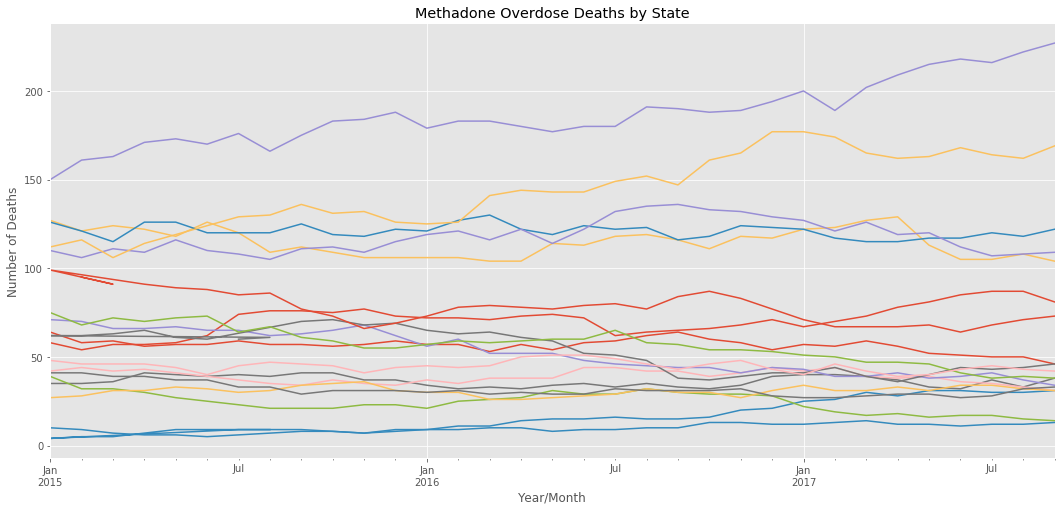

In [23]:
#plotting methadone overdose deaths by state
fig, ax = plt.subplots()
drug2[drug2['Indicator'] == 'Methadone (T40.3)'].groupby(by = ['State']).plot(kind='line', x='Year/Month', y='Data Value', 
figsize=(18,8), legend = False, ax = ax) 
plt.ylabel('Number of Deaths')
plt.xlabel('Year/Month')
plt.title('Methadone Overdose Deaths by State');

In [40]:
#state natural & semi-synthetic opioids overdose deaths mean, min, max
drug2[drug2['Indicator'] == 'Natural & semi-synthetic opioids (T40.2)'].groupby(by=['State'])['Data Value'].agg(['mean', 'min', 'max']).sort_values(by = 'max', ascending = False)

,mean,min,max
State,,,
MD,528.696970,393.0,714.0
NC,546.000000,466.0,614.0
NY,511.666667,412.0,587.0
UT,348.333333,275.0,399.0
WV,347.121212,287.0,390.0
OK,289.878788,247.0,368.0
SC,329.303030,304.0,354.0
VA,313.181818,271.0,352.0
YC,264.333333,176.0,338.0


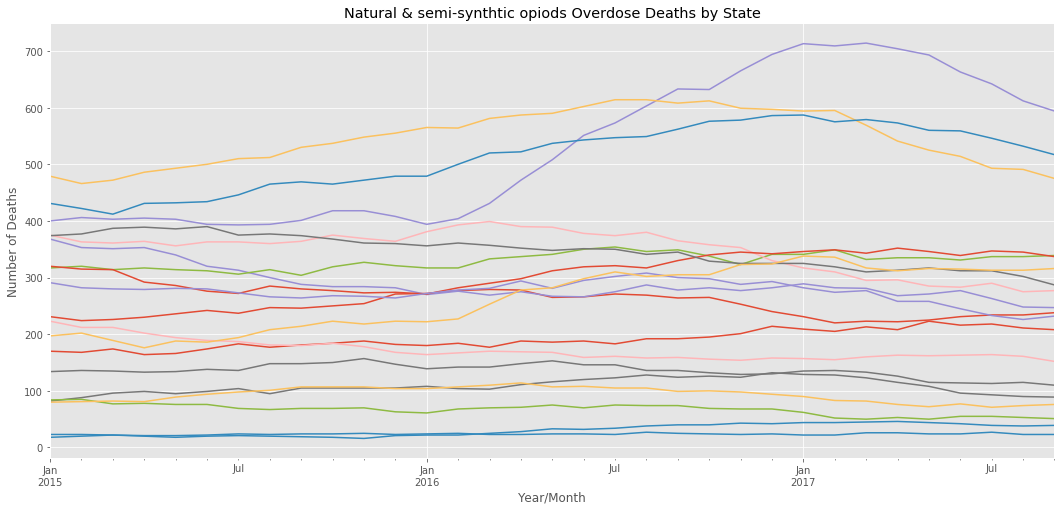

In [24]:
#plotting natural & semi-synthetic opioids overdose deaths by state
fig, ax = plt.subplots()
drug2[drug2['Indicator'] == 'Natural & semi-synthetic opioids (T40.2)'].groupby(by = ['State']).plot(kind='line', x='Year/Month', y='Data Value', 
figsize=(18,8), legend = False, ax = ax) 
plt.ylabel('Number of Deaths')
plt.xlabel('Year/Month')
plt.title('Natural & semi-synthtic opiods Overdose Deaths by State');

In [39]:
#state opioids overdose deaths mean, min, max
drug2[drug2['Indicator'] == 'Opioids (T40.0-T40.4,T40.6)'].groupby(by=['State'])['Data Value'].agg(['mean', 'min', 'max']).sort_values(by = 'max', ascending = False)

,mean,min,max
State,,,
MD,1457.000000,936.0,2038.0
NY,1649.454545,1172.0,2027.0
NC,1299.484848,979.0,1571.0
YC,900.545455,587.0,1214.0
VA,952.272727,748.0,1187.0
CT,757.484848,530.0,962.0
WV,691.000000,580.0,843.0
WA,705.636364,641.0,768.0
SC,587.666667,508.0,735.0


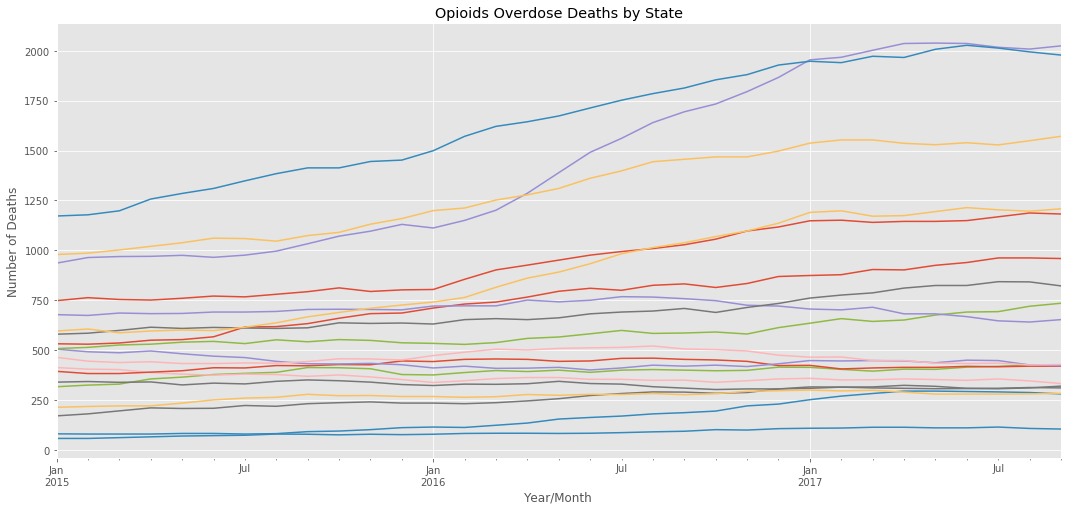

In [25]:
#plotting opioids overdose death by state
fig, ax = plt.subplots()
drug2[drug2['Indicator'] == 'Opioids (T40.0-T40.4,T40.6)'].groupby(by = ['State']).plot(kind='line', x='Year/Month', y='Data Value', 
figsize=(18,8), legend = False, ax = ax)
plt.ylabel('Number of Deaths')
plt.xlabel('Year/Month')
plt.title('Opioids Overdose Deaths by State');

In [38]:
#state psychostimulants with abuse potential overdose deaths mean, min, max
drug2[drug2['Indicator'] == 'Psychostimulants with abuse potential (T43.6)'].groupby(by=['State'])['Data Value'].agg(['mean', 'min', 'max']).sort_values(by = 'max', ascending = False)

,mean,min,max
State,,,
WA,314.939394,241.0,364.0
OK,225.727273,164.0,299.0
NV,219.575758,152.0,293.0
WV,91.848485,40.0,194.0
SC,110.090909,66.0,178.0
UT,146.212121,109.0,171.0
OR,133.575758,99.0,167.0
NM,129.939394,113.0,162.0
NC,83.515152,31.0,136.0


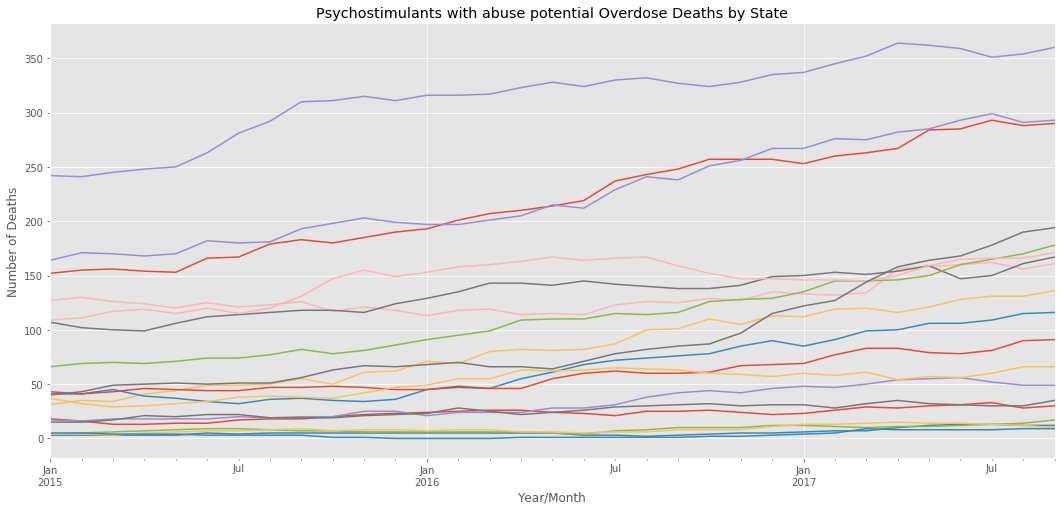

In [26]:
#plotting psychostimulants with abuse potential overdose deaths by state
fig, ax = plt.subplots()
drug2[drug2['Indicator'] == 'Psychostimulants with abuse potential (T43.6)'].groupby(by = ['State']).plot(kind='line', x='Year/Month', y='Data Value', 
figsize=(18,8), legend = False, ax = ax) 
plt.ylabel('Number of Deaths')
plt.xlabel('Year/Month')
plt.title('Psychostimulants with abuse potential Overdose Deaths by State');

In [37]:
#state synthetic opioids overdose deaths mean, min, max
drug2[drug2['Indicator'] == 'Synthetic opioids, excl. methadone (T40.4)'].groupby(by=['State'])['Data Value'].agg(['mean', 'min', 'max']).sort_values(by = 'max', ascending = False)

,mean,min,max
State,,,
MD,745.333333,227.0,1533.0
NY,791.848485,248.0,1355.0
NC,470.363636,209.0,922.0
VA,441.636364,182.0,760.0
YC,343.363636,38.0,750.0
CT,349.393939,96.0,647.0
WV,329.151515,128.0,612.0
NH,302.636364,171.0,371.0
SC,200.242424,110.0,359.0


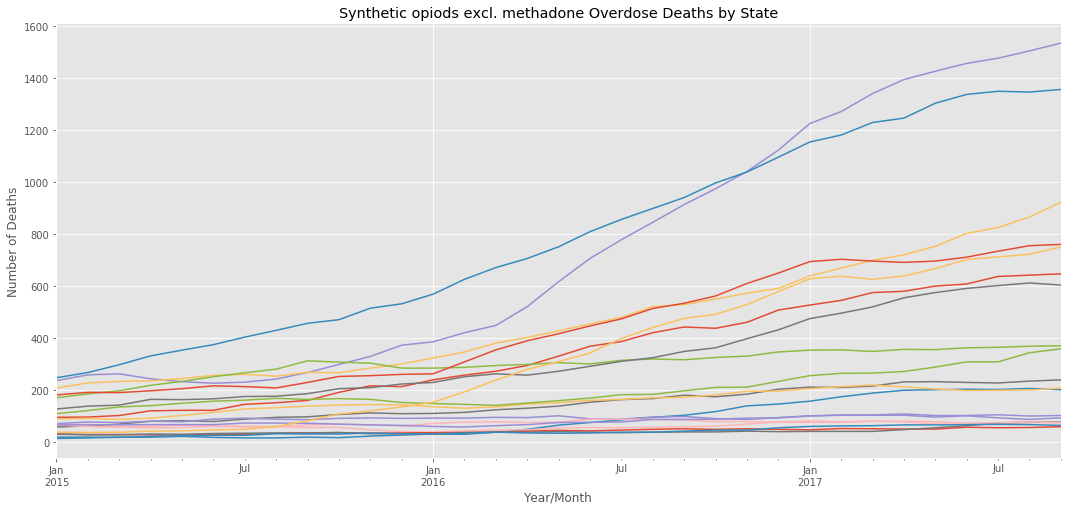

In [27]:
#plotting synthetic opioids excl. methadone overdose deaths by state
fig, ax = plt.subplots()
drug2[drug2['Indicator'] == 'Synthetic opioids, excl. methadone (T40.4)'].groupby(by = ['State']).plot(kind='line', x='Year/Month', y='Data Value', 
figsize=(18,8), legend = False, ax = ax) 
plt.ylabel('Number of Deaths')
plt.xlabel('Year/Month')
plt.title('Synthetic opiods excl. methadone Overdose Deaths by State');